### This file decribes how to get scrape a working csv-file from wikinews.org 

- to get a working file execute all cells. The individual steps are described througout the notebook. WHen creating files and moving files they don't always show up until you reopen vscode.

- The cell below uses the terminal(%%bash) to start the web-scraper by navigating into the scrapy-project folder and create the file in the scrapy-project folder. This can be slow the first time by design, but afterwards we have cached the results. It is done when the cell gives some text output. After all this the file has to be moved


In [43]:
import pandas as pd # Read csv
import numpy as np  # LinAlg
import os           # Read filepaths
import shutil       # Move files

In [9]:
%%bash
cd ..
cd Code
cd Wiki_News_Scrapy
scrapy crawl wiki -o wiki_news_nr_12_raw.csv

o-tourism  highlighting the country's rainforests and unique  "
             'mammal  species, brings $800 million annually to the Madagascan '
             'economy.\n'
             ' \n'
             ' " " —  , March 16, 2009 \n'],
 'publish_date': ['March 17, 2009'],
 'scraped_at': ['2020-05-26'],
 'sources_url': ['http://blogs.reuters.com/africanews/2009/03/17/madagascar-a-slow-motion-coup/',
                 'http://www.reuters.com/article/latestCrisis/idUSLH574492',
                 'http://www.google.com/hostednews/ap/article/ALeqM5hfV75EHUookBtBk2OlprGZBpDTzgD96VSCPO0',
                 'http://www.reuters.com/article/topNews/idUSTRE52G3EU20090317',
                 'http://www.cbc.ca/world/story/2009/03/17/madagascar-president.html',
                 'http://www.radionetherlands.nl/news/international/6218821/Madagascars-Ravalomanana-resigns',
                 'http://news.xinhuanet.com/english/2009-03/18/content_11028176.htm',
                 'http://www.guardian.co.uk/world/

In [11]:
# This cell moves the files created by scrapy to a datafolder

# Name of file to move
file_name = 'wiki_news_nr_12_raw.csv'
# Source-folder-path of file
src = '../Code/Wiki_News_Scrapy/'
# Destination-folder-path for file
dst = '../Data_sample/'


# Move file if located in src - overwrites file in dst
if os.path.isfile(src+file_name):
    print('Moving: %s\n From: %s\n Into: %s' % (file_name, src, dst))

    # print if overwriting
    if os.path.isfile(dst+file_name):
        print('\n Overwriting: %s in dst' % (file_name))

    # moving file
    shutil.move(src+file_name, dst+file_name)
else:
    print('NOT Moving: %s\n From: %s\n Into: %s' % (file_name, src, dst))

# Display after movement
print('\nAfter\n Files in src: %s - src: %s\n Files in dst: %s - dst: %s' % (os.listdir(src), src, os.listdir(dst), dst))

NOT Moving: wiki_news_nr_12_raw.csv
 From: ../Code/Wiki_News_Scrapy/
 Into: ../Data_sample/

After
 Files in src: ['.scrapy', 'Wiki_News_Scrapy', 'README.md', 'text_for_DS_5.md', 'scrapy.cfg'] - src: ../Code/Wiki_News_Scrapy/
 Files in dst: ['git_ignore.txt', 'wiki_news_nr_12_raw.csv'] - dst: ../Data_sample/


In [77]:
# This cant be run before the cell above

# This cell and cells below explore the data of the wikinews.org csv-file



# create dataframe
df = pd.read_csv(dst+file_name)

In [79]:
df.describe()

,about_sources_wiki_url,article_url,categories,content,publish_date,scraped_at,sources_url,title
count,3470,3679,3679,3677,3672,3679,3464,3679
unique,3207,3679,3664,3677,2106,1,3464,3679
top,"/wiki/Al_Jazeera,/wiki/BBC_News_Online",https://en.wikinews.org/wiki/Mauritania_cuts_t...,"October 7, 2007,Original reporting,Interview,P...",\n United States President Barack Obama unv...,"October 2, 2007",2020-05-26,http://english.aljazeera.net/news/asia-pacific...,President of Kosovo Fatmir Sejdiu resigns over...
freq,16,1,4,1,10,3679,1,1


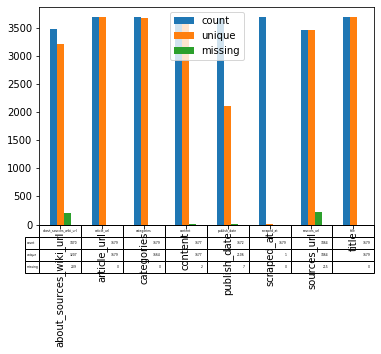

In [120]:
# Calculating number: count, unique for each column
describe_df = df.describe(include=[np.object]).head(2)

# Calculating number: NaN for each column
nan_df = df.isna().sum()

describe_df.loc['missing'] = nan_df
describe_df.T.plot(kind='bar',  table=True)

In [127]:
df['about_sources_wiki_url'].sample(20)

3603    https://en.wikipedia.org/wiki/Asahi_Shimbun,/w...
2110    /wiki/BBC_News_Online,/wiki/BBC_News_Online,ht...
1918    https://en.wikipedia.org/wiki/Thames_Valley_Po...
2629    https://en.wikipedia.org/wiki/Pajamas_Media,ht...
203     /wiki/ABC_News,/wiki/MSNBC,https://en.wikipedi...
650      https://en.wikipedia.org/wiki/TSR,/wiki/BBC_News
2293    https://en.wikipedia.org/wiki/Christian_Scienc...
1735                 /wiki/BBC_News_Online,/wiki/FOX_News
2310            /wiki/BBC_News,/wiki/World_Economic_Forum
1740                           /wiki/Al_Jazeera,/wiki/CNN
2356    https://en.wikipedia.org/wiki/VisitBulgaria,/w...
1181    https://en.wikipedia.org/wiki/African_Press_Ag...
3494    /wiki/CNN,https://en.wikipedia.org/wiki/The_Hu...
3179    https://en.wikipedia.org/wiki/Taiwan_News,/wik...
2682                                                  NaN
3596    https://en.wikipedia.org/wiki/Columbia_Citypap...
880     https://en.wikipedia.org/wiki/U.S._Department_...
56      /wiki/

In [131]:
df.iloc[3603, 0]

'https://en.wikipedia.org/wiki/Asahi_Shimbun,/wiki/New_York_Times,https://en.wikipedia.org/wiki/Telegraph,https://en.wikipedia.org/wiki/Cadenra_SER,https://en.wikipedia.org/wiki/Europa_Press,https://en.wikipedia.org/wiki/El_Mundo,https://en.wikipedia.org/wiki/Galicia%C3%A9'

In [117]:
fig, ax = plt.subplots(1, 1)

In [163]: d = count_unique_df.T

In [164]: ax.get_xaxis().set_visible(False)   # Hide Ticks

In [165]: d.plot(table=True, ax=ax)

IndexError: list assignment index out of range

In [55]:
a.append(b, ignore_index=True)


,about_sources_wiki_url,article_url,categories,content,publish_date,scraped_at,sources_url,title
0,3470,3679,3679,3677,3672,3679,3464,3679
1,3207,3679,3664,3677,2106,1,3464,3679
2,209,0,0,2,7,0,215,0


In [36]:
df.isna().sum()

about_sources_wiki_url    209
article_url                 0
categories                  0
content                     2
publish_date                7
scraped_at                  0
sources_url               215
title                       0
dtype: int64

In [68]:
k = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
k

,lab,val
0,A,10
1,B,30
2,C,20


In [73]:
ax = k.plot.bar(x='val', y='lab', rot=0)

TypeError: no numeric data to plot